In [2]:
import numpy as np
import pandas as pd

In [3]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("C:/Users/HP/Downloads/Diabetes_Detection.csv")

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Understanding Data

In [6]:
### Pregancies column refer to the number of pregnancies of patients.
### Glucose column refer to the glucose level of patients.
### Blood Pressure refer to the blood pressure of patients.
### Skin thickness refers to the thickness of skin of patients
### Insulin column refers to the use of insulin in patients
### BMI column refers to Body Mass Index of the patients
### DiabestesPedigreeFunction indicates the function which scores likelihood of diabetes based on family history.
### Age column refers to the age of the patients
### Outcome refers that if the patient have diabetes (1) or not (0)

In [7]:
# renaming columns - converting into lowercase
rename_columns = ["pregnancies","glucose","blood_pressure","skin_thickness","insulin","bmi","diabetes_ped_func","age","outcome"]
df.columns = rename_columns

In [8]:
# checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_ped_func  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# getting basic statistics for the data
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_ped_func,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [10]:
# checking for null values
df.isna().sum()

pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_ped_func    0
age                  0
outcome              0
dtype: int64

### No null values are present in the data

In [11]:
# checking for duplicates
df[df.duplicated()]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_ped_func,age,outcome


### No duplicated values are spotted in the data

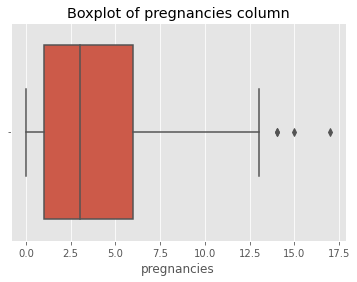

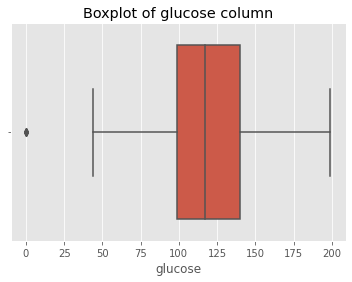

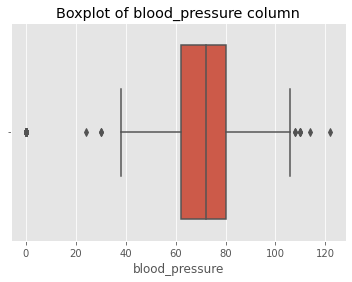

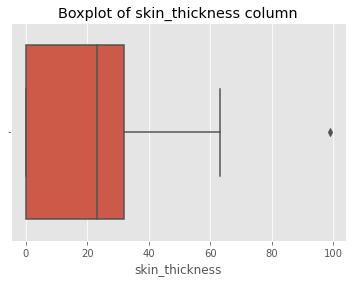

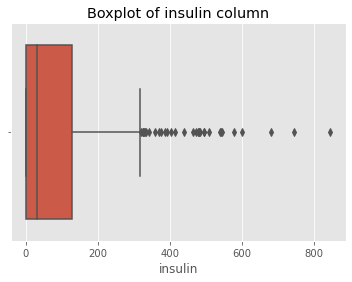

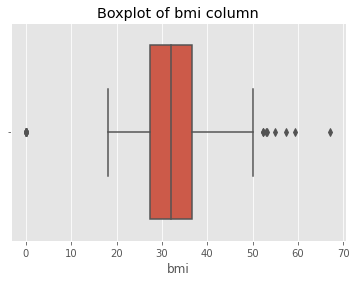

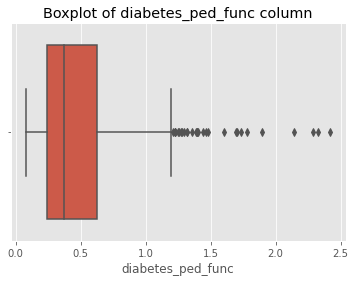

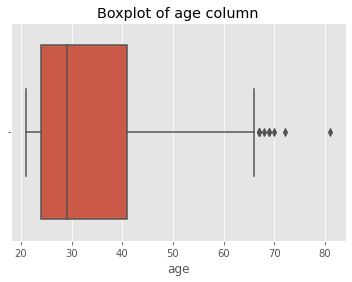

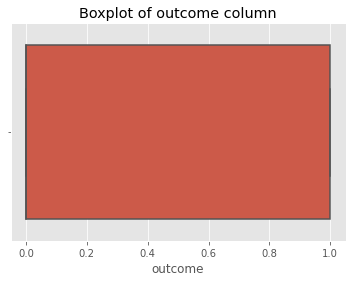

In [12]:
# making boxplot for numerical columns to detect outliers
plt.style.use("ggplot")
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.title("Boxplot of {} column".format(col))
    plt.show()

In [13]:
### There is outliers 

In [14]:
df.shape

(768, 9)

In [46]:
# checking data types 
df.dtypes

pregnancies            int64
glucose                int64
blood_pressure         int64
skin_thickness         int64
insulin                int64
bmi                  float64
diabetes_ped_func    float64
age                    int64
outcome                int64
dtype: object

In [15]:
# Counting the unique values of the target column
diabetes_count = df["outcome"].value_counts()
print("Patients without diabetes {}".format(diabetes_count[0]))
print("-" * 30)
print("Patients with diabetes {}".format(diabetes_count[1]))

Patients without diabetes 500
------------------------------
Patients with diabetes 268


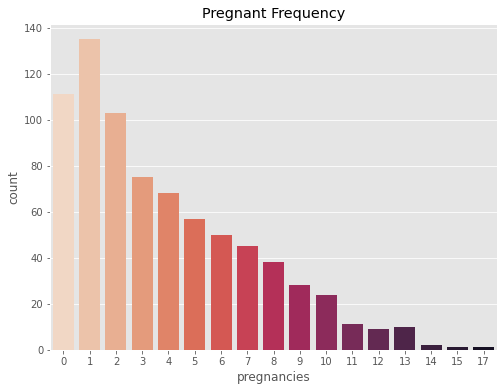

In [16]:
# pregnancies frequency
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.countplot(x="pregnancies",data=df,palette="rocket_r")
plt.title("Pregnant Frequency")
plt.show()
#pregnant_count = df["pregnancies"].value_counts()

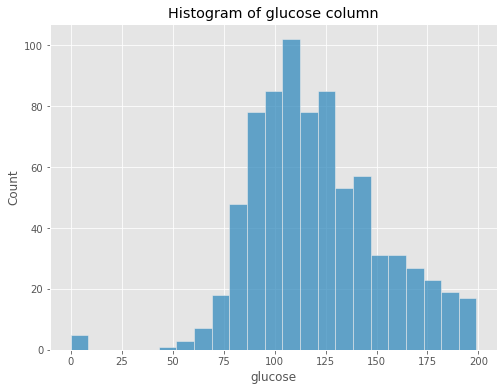

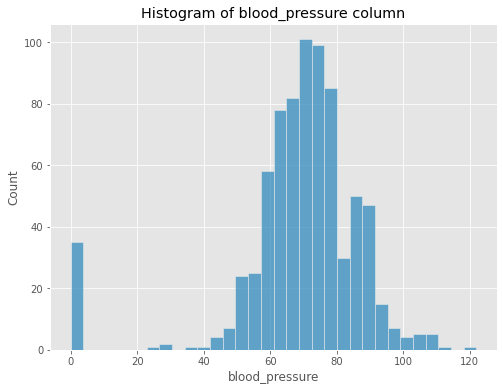

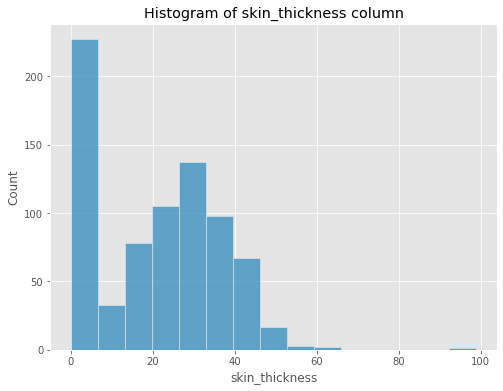

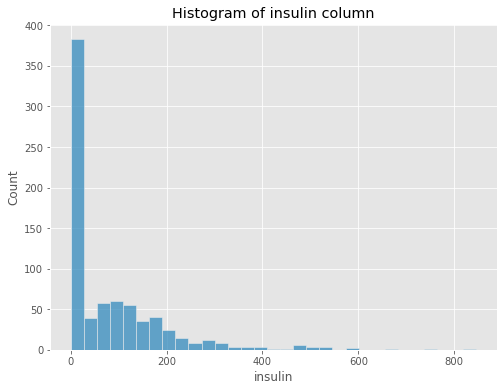

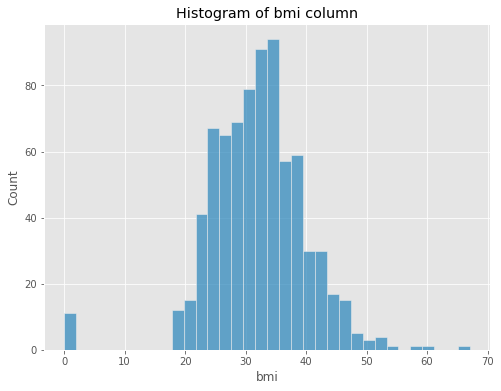

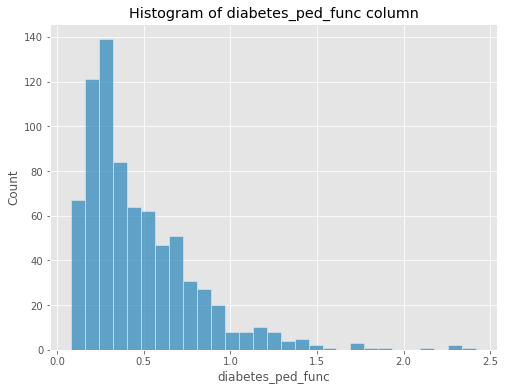

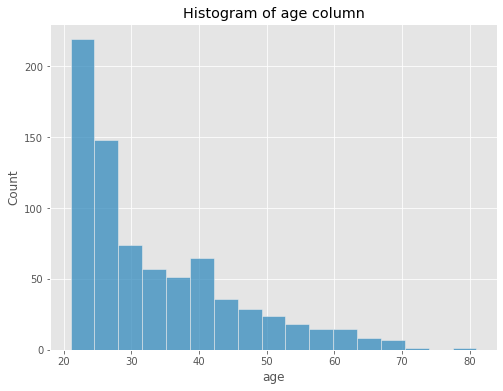

In [17]:
# making histograms of the following columns to see their distribution
num_col = ['glucose',"blood_pressure","skin_thickness","insulin","bmi","diabetes_ped_func","age"]
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col])
    plt.title("Histogram of {} column".format(col))
    plt.show()

In [18]:
#Some columns are normally distrubted and some columns are right skewed
#Column distributions that are normally or roughly normally distributed are glucose, blood pressure, skin thickness and bmi.
#Column distributions that are rightly skewed are insulin, diabetes_ped_func and age.
#To make all the variables normal we can apply normalization technique.

## Age and outcome

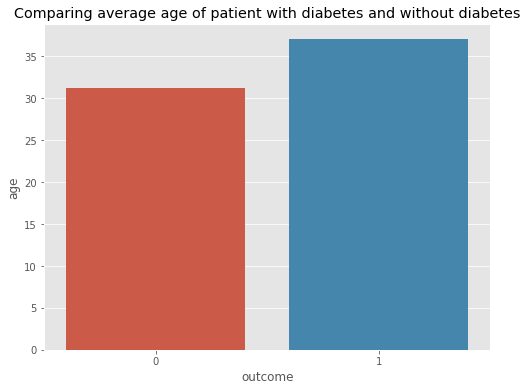

In [19]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="age",data=df,ci= False)
plt.title("Comparing average age of patient with diabetes and without diabetes")
plt.show()

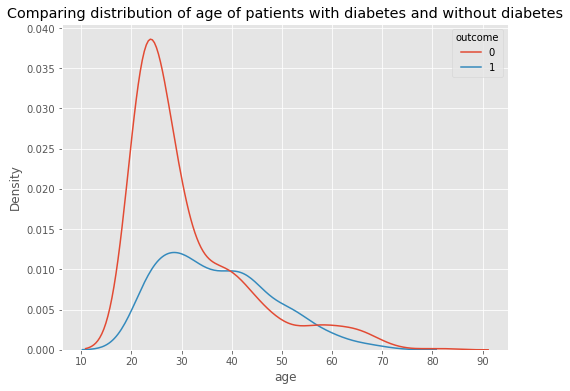

In [20]:
# plotting kernel density estimation of age distribution of diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="age",hue="outcome",data=df)
plt.title("Comparing distribution of age of patients with diabetes and without diabetes")
plt.show()

### There is a difference in the age of patient with diabetes and without diabetes

## Diabetes Pedigree Function and Outcome

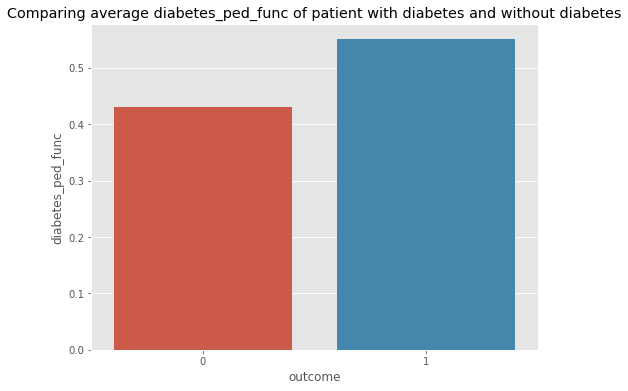

In [21]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="diabetes_ped_func",data=df,ci= False)
plt.title("Comparing average diabetes_ped_func of patient with diabetes and without diabetes")
plt.show()

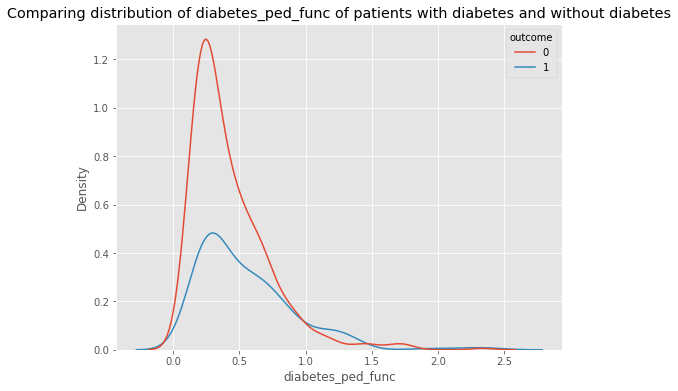

In [22]:
# plotting kernel density estimation of diabtes pedigree distribution of diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="diabetes_ped_func",hue="outcome",data=df)
plt.title("Comparing distribution of diabetes_ped_func of patients with diabetes and without diabetes")
plt.show()

### There is a difference in the diabetes pedigree function of patient with diabetes and without diabetes. 

## BMI and Outcome

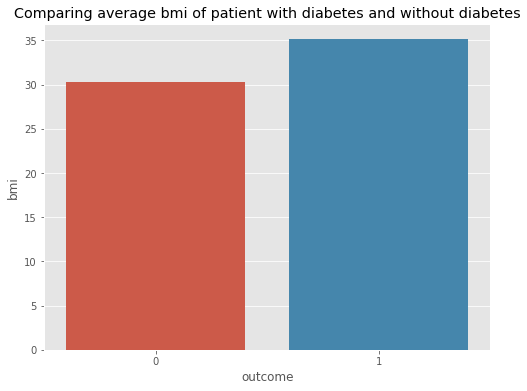

In [23]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="bmi",data=df,ci= False)
plt.title("Comparing average bmi of patient with diabetes and without diabetes")
plt.show()

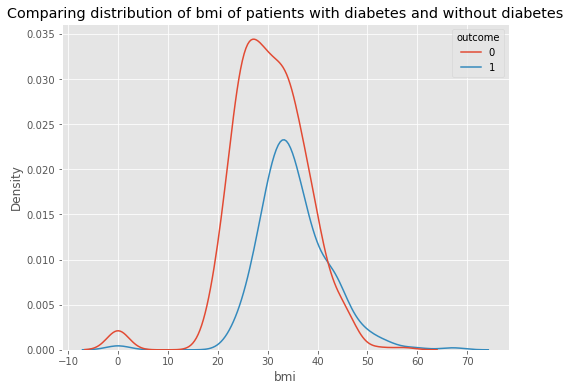

In [24]:
# plotting kernel density estimation plot for bmi with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="bmi",hue="outcome",data=df)
plt.title("Comparing distribution of bmi of patients with diabetes and without diabetes")
plt.show()

### There is a difference in the bmi of patient with diabetes and without diabetes

## Insulin and Outcome

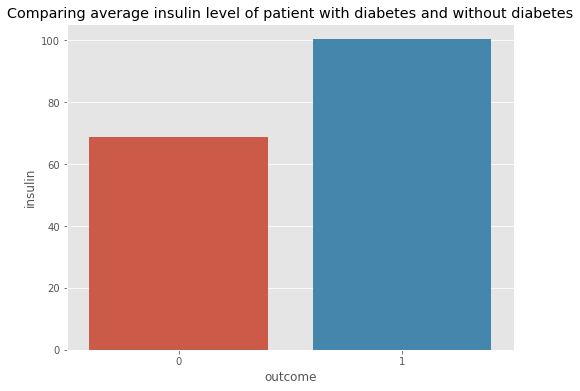

In [25]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="insulin",data=df,ci= False)
plt.title("Comparing average insulin level of patient with diabetes and without diabetes")
plt.show()

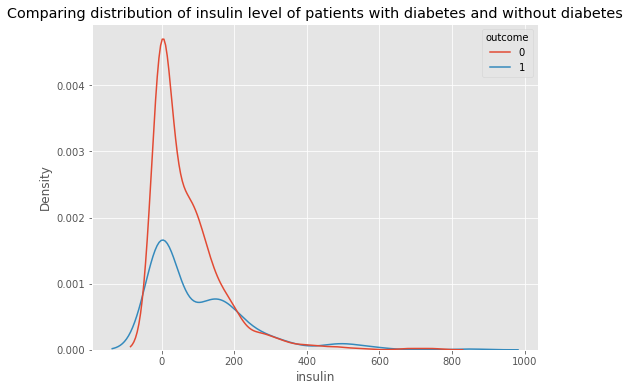

In [26]:
# plotting kernel density estimation plot for insulin with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="insulin",hue="outcome",data=df)
plt.title("Comparing distribution of insulin level of patients with diabetes and without diabetes")
plt.show()

### There is a difference in the average insulin level of patient with diabetes and withut diabetes.

## Skin Thickness and Outcome

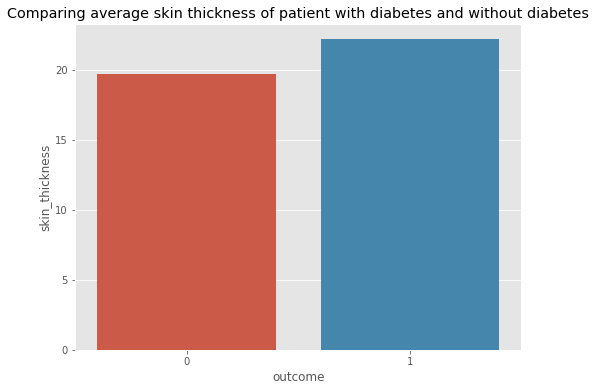

In [27]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="skin_thickness",data=df,ci= False)
plt.title("Comparing average skin thickness of patient with diabetes and without diabetes")
plt.show()

### There seem to be a difference in the average skin thickness of patient with diabetes and without diabetes. 

## Blood Pressure and Outcome

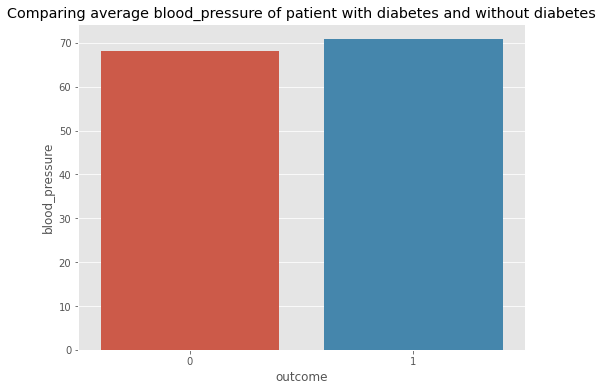

In [28]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="blood_pressure",data=df,ci= False)
plt.title("Comparing average blood_pressure of patient with diabetes and without diabetes")
plt.show()

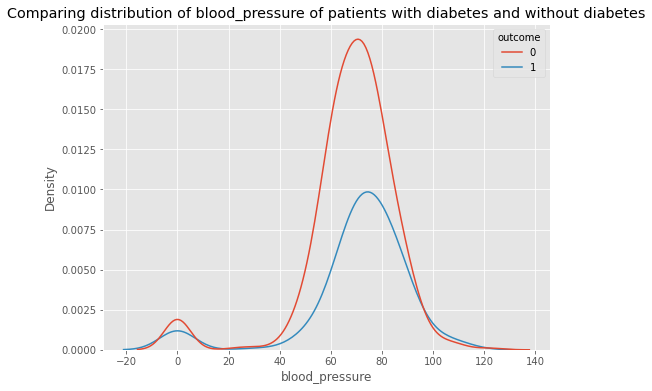

In [29]:
# plotting kernel density estimation plot for blood pressure with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="blood_pressure",hue="outcome",data=df)
plt.title("Comparing distribution of blood_pressure of patients with diabetes and without diabetes")
plt.show()

### There seem to be a difference in the average blood pressure of patient with diabetes and without diabetes.

## Glucose level and Outcome

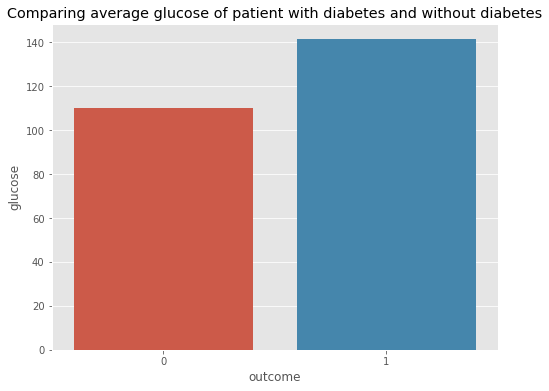

In [30]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="outcome",y="glucose",data=df,ci= False)
plt.title("Comparing average glucose of patient with diabetes and without diabetes")
plt.show()


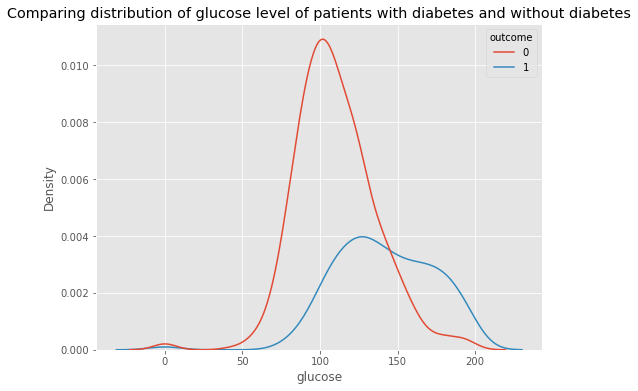

In [31]:
# plotting kernel density estimation plot for glucose with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="glucose",hue="outcome",data=df)
plt.title("Comparing distribution of glucose level of patients with diabetes and without diabetes")
plt.show()

### There seem to be a difference in the average glucose level of patient with diabetes and without diabetes.

In [ ]:
#From the graphs of each variable,
#The patient who suffer from diabetes have following characteristics than those who do not suffer.
#They are older
#They have high glucose level
#They have high blood pressure
#They have high bmi
#They have high diabetes pedigree function
#For the skin thickness and insulin it cannot be said.

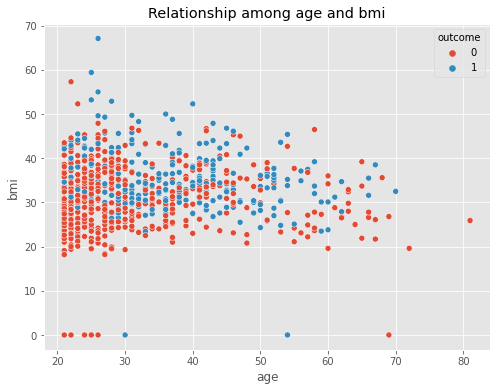

In [32]:
# making a scatterplot of age vs bmi to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y="bmi",data=df,hue="outcome")
plt.title('Relationship among age and bmi')
plt.show()

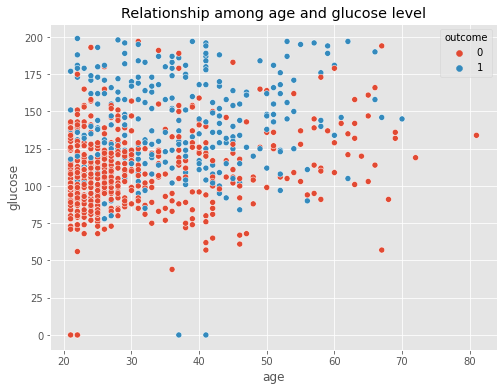

In [33]:
# making a scatterplot of age vs glucose level to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y="glucose",data=df,hue="outcome")
plt.title('Relationship among age and glucose level')
plt.show()

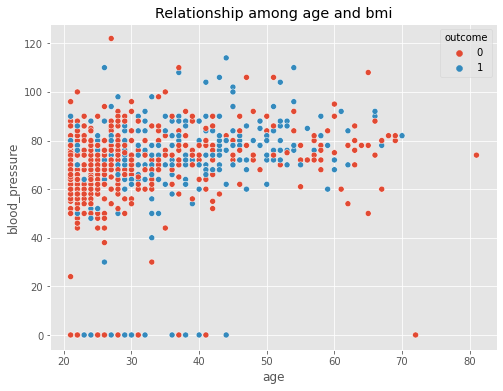

In [34]:
# making a scatterplot of age vs blood pressure to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y="blood_pressure",data=df,hue="outcome")
plt.title('Relationship among age and bmi')
plt.show()

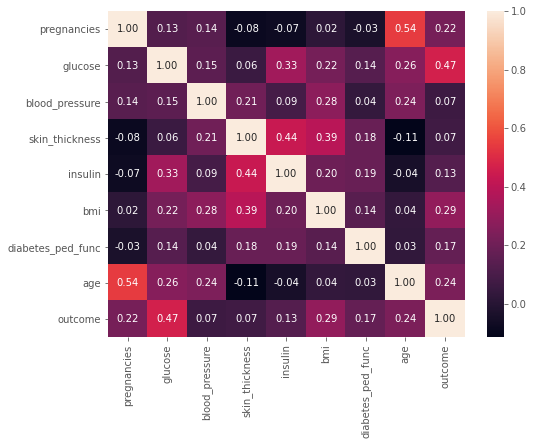

In [35]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

### From the heatmap we can see, being diabetic is correlated with the glucose level, bmi and age.